In [ ]:
! pip install tensorflow==2.9.2 tensorflow-gpu==2.9.2 opencv-python mediapipe sklearn matplotlib

In [ ]:
import cv2 as cv
import numpy as np
import os
import time
from matplotlib import pyplot as plt
import mediapipe as mp

%matplotlib inline

In [67]:
cap = cv.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    cv.imshow('OpenCV Feed', frame)
    if cv.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

### Keypoints using Mediapipe Holistic

In [ ]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [ ]:
def med_detection(image, model):
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image.flags.writeable = False  # image no longer writeable
    results = model.process(image) # making prediction
    image.flags.writeable = True   # image now writeable
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image, results

In [92]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Face Connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)  # Pose Connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Left Hand Connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Right Hand Connections

In [93]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [94]:
cap = cv.VideoCapture(0)
# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        
        image, results = med_detection(frame, holistic)
        # print(results)
        if results.left_hand_landmarks:
            landmark_list_pose = results.left_hand_landmarks.landmark
        
        cv.imshow('OpenCV Feed', frame)
        if cv.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv.destroyAllWindows()

In [95]:
len(landmark_list_pose)

21

In [96]:
frame

array([[[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [191, 192, 199],
        [192, 194, 202],
        [194, 196, 204]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [190, 191, 198],
        [191, 192, 199],
        [192, 193, 201]],

       [[255, 254, 255],
        [255, 254, 255],
        [255, 254, 255],
        ...,
        [189, 191, 196],
        [191, 191, 198],
        [191, 191, 198]],

       ...,

       [[174, 172, 165],
        [174, 172, 165],
        [174, 172, 165],
        ...,
        [144, 148, 149],
        [141, 146, 147],
        [139, 144, 145]],

       [[172, 170, 164],
        [172, 170, 164],
        [173, 171, 165],
        ...,
        [144, 146, 147],
        [144, 146, 147],
        [143, 145, 146]],

       [[171, 168, 163],
        [171, 168, 163],
        [172, 169, 164],
        ...,
        [144, 144, 146],
        [144, 145, 146],
        [144, 145, 146]]

In [99]:
draw_landmarks(frame, results)

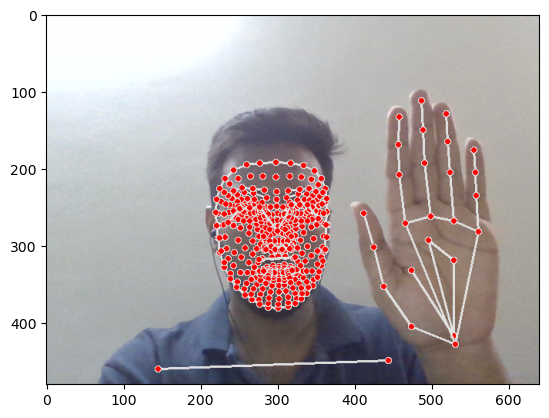

In [100]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))